# static dielectric constant (ε₀)

Processing file: PSTRESS\OUTCAR_0
Processing file: PSTRESS\OUTCAR_100
Processing file: PSTRESS\OUTCAR_15
Processing file: PSTRESS\OUTCAR_150
Processing file: PSTRESS\OUTCAR_200
Processing file: PSTRESS\OUTCAR_225
Processing file: PSTRESS\OUTCAR_250
Processing file: PSTRESS\OUTCAR_300
Processing file: PSTRESS\OUTCAR_35
Processing file: PSTRESS\OUTCAR_350
Processing file: PSTRESS\OUTCAR_50


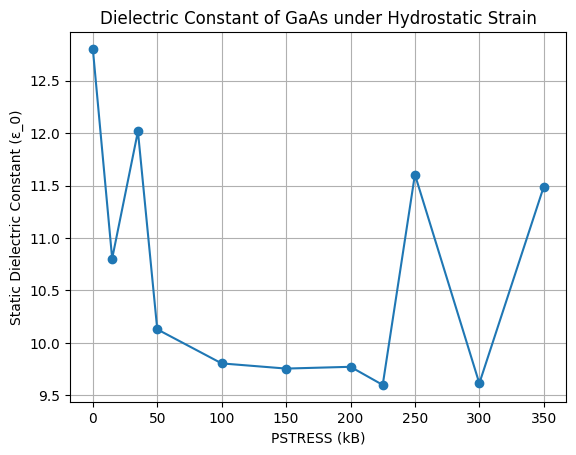

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# List of OUTCAR files ( filenames OUTCAR_0, OUTCAR_50, etc.)
outcar_files = sorted(glob.glob("PSTRESS/OUTCAR_*"))

dielectric_constants = []

for file in outcar_files:
    with open(file, "r") as OUTCAR:
        data_real = []
        energy_array = []

        print(f"Processing file: {file}")

        # Read Real Dielectric Function
        found_real = False
        for line in OUTCAR:
            if "frequency dependent      REAL DIELECTRIC FUNCTION (independent particle, no local field effects) current-current" in line:
                found_real = True
                next(OUTCAR)  # Skip column header line
                next(OUTCAR)  # Skip separator line
                break

        if not found_real:
            print(f"Warning: REAL dielectric function not found in {file}")
            continue

        # Read the dielectric function values
        for line in OUTCAR:
            if line.strip() == "":  # Stop when an empty line is reached
                break
            values = line.split()
            energy_array.append(float(values[0]))  # Energy (eV)
            data_real.append(float(values[1]))  # ε_xx (first principal component)

        # Convert to NumPy arrays
        energy_array = np.array(energy_array)
        data_real = np.array(data_real)

        if len(data_real) == 0:
            print(f"Error: No dielectric data extracted from {file}")
            continue  # Skip this file

        # Static dielectric constant = ε_xx at lowest frequency (~0 eV)
        epsilon_static = data_real[0]  
        dielectric_constants.append(epsilon_static)

# Define corresponding PSTRESS values (Modify if filenames differntt)
pstress_values = [0, 15, 35, 50, 100, 150, 200, 225, 250, 300, 350]  # kB

# Check if any data was collected before plotting
if not dielectric_constants:
    print("No valid dielectric constants extracted. Check OUTCAR files.")
else:
    # Plot dielectric constant vs. PSTRESS
    plt.plot(pstress_values, dielectric_constants, marker='o', linestyle='-')
    plt.xlabel("PSTRESS (kB)")
    plt.ylabel("Static Dielectric Constant (ε_0)")
    plt.title("Dielectric Constant of GaAs under Hydrostatic Strain")
    plt.grid(True)
    plt.show()


# full dielectric function vs. photon energy for different strains.

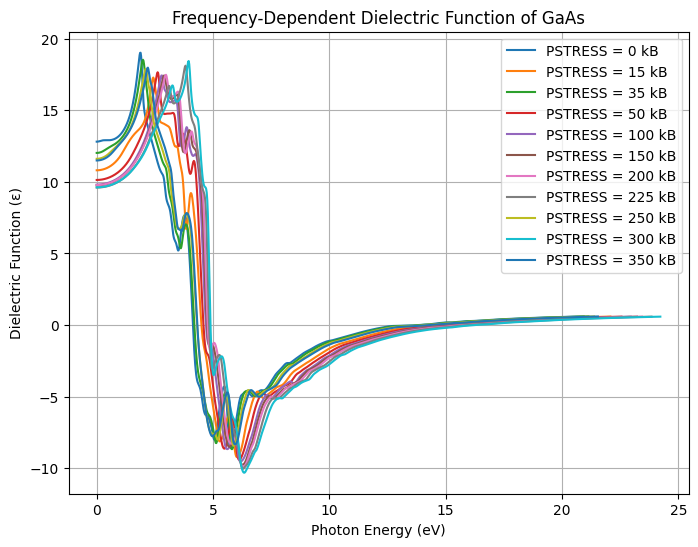

In [8]:
all_frequencies = []
all_dielectrics = []

for file in outcar_files:
    with open(file, "r") as OUTCAR:
        energy_array = []
        data_real = []

        # Locate the real dielectric function
        for line in OUTCAR:
            if "frequency dependent      REAL DIELECTRIC FUNCTION (independent particle, no local field effects) current-current" in line:
                found_real = True
                next(OUTCAR)  # Skip column header line
                next(OUTCAR)  # Skip separator line
                break

        # Read dielectric function data
        for line in OUTCAR:
            if line.strip() == "":  # Stop at empty line
                break
            values = list(map(float, line.split()))
            energy_array.append(values[0])  # Energy (eV)
            data_real.append(values[1])  # ε_xx

        # Convert to arrays
        energy_array = np.array(energy_array)
        data_real = np.array(data_real)

        if len(data_real) == 0:
            print(f"Error: No dielectric data extracted from {file}")
            continue

        # Store results
        all_frequencies.append(energy_array)
        all_dielectrics.append(data_real)

plt.figure(figsize=(8, 6))
for i, pstress in enumerate(pstress_values):
    plt.plot(all_frequencies[i], all_dielectrics[i], label=f"PSTRESS = {pstress} kB")

plt.xlabel("Photon Energy (eV)")
plt.ylabel("Dielectric Function (ε)")
plt.title("Frequency-Dependent Dielectric Function of GaAs")
plt.legend()
plt.grid(True)
plt.show()

# Frequency-Dependent Refractive Index of GaAs or different strains.

C:\Users\Jafet\AppData\Local\Temp\ipykernel_21344\629742560.py:43: RuntimeWarning: divide by zero encountered in divide
  wavelength_array = (h * c / energy_array) * 1e9  # van m naar nm


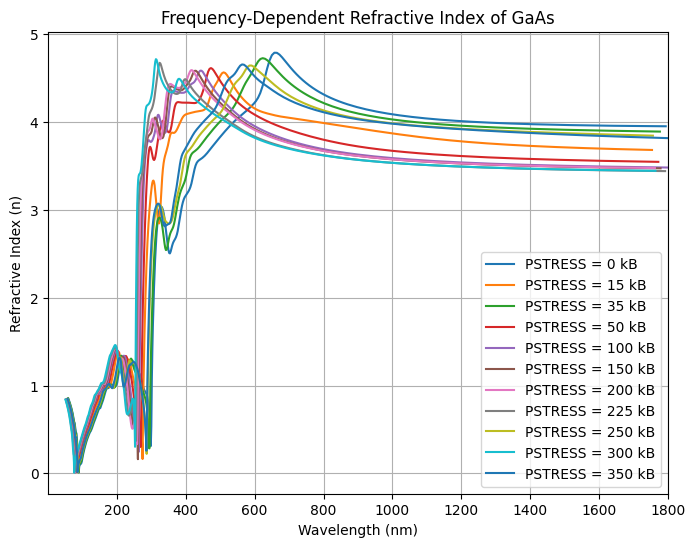

In [5]:
import numpy as np
import matplotlib.pyplot as plt


h = 4.135667696e-15
c = 2.99792458e8

all_wavelengths = []
all_refractive_indices = []

for file in outcar_files:
    with open(file, "r") as OUTCAR:
        energy_array = []
        data_real = []
        data_img = []

        # Locate the real and imaginary dielectric function
        for line in OUTCAR:
            if "frequency dependent      REAL DIELECTRIC FUNCTION (independent particle, no local field effects) current-current" in line:
                next(OUTCAR)  # Skip column header
                next(OUTCAR)  # Skip separator
                break

        # Read dielectric function data (real part)
        for line in OUTCAR:
            if line.strip() == "":
                break
            values = list(map(float, line.split()))
            energy_array.append(values[0])   # Energy (eV)
            data_real.append(values[1])      # ε_xx real part
            data_img.append(values[2])       # ε_xx imaginary part

        # Omzetten naar arrays
        energy_array = np.array(energy_array)
        data_real = np.array(data_real)
        data_img = np.array(data_img)

        if len(data_real) == 0 or len(data_img) == 0:
            print(f"Error: No dielectric data extracted from {file}")
            continue
        
        # Energie omzetten naar golflengte (in nm)
        wavelength_array = (h * c / energy_array) * 1e9  # van m naar nm

        # Brekingsindex berekenen met aangepaste formule
        refractive_index_array = np.sqrt((np.sqrt(data_real**2 + data_img**2) + data_real) / 2)

        # Beperk golflengte tot bereik 300 nm - 1200 nm
        mask = (wavelength_array >= 1) & (wavelength_array <= 1800)
        wavelength_array = wavelength_array[mask]
        refractive_index_array = refractive_index_array[mask]

        all_wavelengths.append(wavelength_array)
        all_refractive_indices.append(refractive_index_array)

plt.figure(figsize=(8, 6))
for i, pstress in enumerate(pstress_values):
    plt.plot(all_wavelengths[i], all_refractive_indices[i], label=f"PSTRESS = {pstress} kB")

plt.xlim(1, 1800)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Refractive Index (n)")
plt.title("Frequency-Dependent Refractive Index of GaAs")
plt.legend()
plt.grid(True)
plt.show()

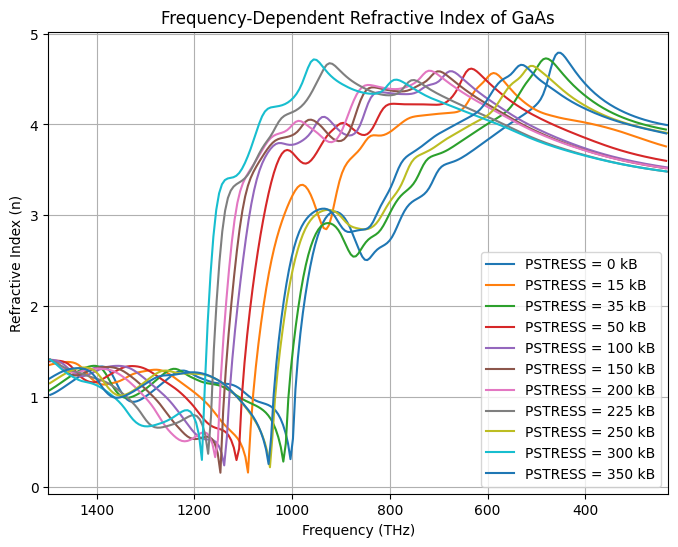

In [4]:
import numpy as np
import matplotlib.pyplot as plt

h = 4.135667696e-15
c = 2.99792458e8

all_frequencies = []
all_refractive_indices = []

for file in outcar_files:
    with open(file, "r") as OUTCAR:
        energy_array = []
        data_real = []
        data_img = []

        # Locate the real and imaginary dielectric function
        for line in OUTCAR:
            if "frequency dependent      REAL DIELECTRIC FUNCTION (independent particle, no local field effects) current-current" in line:
                next(OUTCAR)  # Skip column header
                next(OUTCAR)  # Skip separator
                break

        # Read dielectric function data (real part)
        for line in OUTCAR:
            if line.strip() == "":
                break
            values = list(map(float, line.split()))
            energy_array.append(values[0])   # Energy (eV)
            data_real.append(values[1])      # ε_xx real part
            data_img.append(values[2])       # ε_xx imaginary part

        # Convert lists to arrays
        energy_array = np.array(energy_array)
        data_real = np.array(data_real)
        data_img = np.array(data_img)

        if len(data_real) == 0 or len(data_img) == 0:
            print(f"Error: No dielectric data extracted from {file}")
            continue

        # Convert energy (eV) to frequency (THz)
        frequency_array = energy_array / h  # eV to Hz
        frequency_array = frequency_array * 1e-12  # Convert Hz to THz

        # Calculate refractive index
        refractive_index_array = np.sqrt((np.sqrt(data_real**2 + data_img**2) + data_real) / 2)

        # Limit frequency range (corresponding to 300 nm - 1200 nm)
        min_freq = c / (1300e-9) * 1e-12  # THz
        max_freq = c / (200e-9) * 1e-12   # THz
        mask = (frequency_array >= min_freq) & (frequency_array <= max_freq)
        frequency_array = frequency_array[mask]
        refractive_index_array = refractive_index_array[mask]

        all_frequencies.append(frequency_array)
        all_refractive_indices.append(refractive_index_array)

plt.figure(figsize=(8, 6))
for i, pstress in enumerate(pstress_values):
    plt.plot(all_frequencies[i], all_refractive_indices[i], label=f"PSTRESS = {pstress} kB")

plt.xlim(max_freq, min_freq)
plt.xlabel("Frequency (THz)")
plt.ylabel("Refractive Index (n)")
plt.title("Frequency-Dependent Refractive Index of GaAs")
plt.legend()
plt.grid(True)
plt.show()

Key observations:


At 0 kB, the refractive index shows an unusually large increase at longer wavelengths, which is absent or weaker for other stress values.


The refractive index for most stress values sharply increases at  wavelengths just before 300nm, and starts to flatten out at longer wavelengths.


The refractive index behaves non-monotonically with increasing wavelength — it's not a simple "higher wavelength → higher refractive index" relationship.

Generally, for longer wavelengths (where the refractive index flattens out), increasing hydrostatic pressure tends to widen the band gap, thus lowering the refractive index. However, at specific pressures such as 35 kB and 250 kB, quantum-mechanical effects can induce unusual band-structure alignments. Under hydrostatic strain, the conduction and valence band edges shift nonlinearly, modifying the density of states near the band gap and possibly enhancing excitonic or interband transition strengths. These resonances, in turn, boost the real part of the dielectric function at lower photon energies (longer wavelengths), causing the refractive index to rise. Essentially, quantum theory shows that the strain can “tune” electronic states into or out of resonance, leading to peaks or anomalies in the refractive index for certain pressures.